# Importar Módulos

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from scipy import stats
from IPython.display import display

# Formatear como los datos van a salir
### No más de 10 impresas y con 3 decimales

In [29]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.3f}".format

# Preparación de datos

In [30]:
#importar dataset
training_df = pd.read_csv('train_validation.csv')
test_df = pd.read_csv('test.csv')

In [31]:
#aleatorize el dataset
shuffled_training_df = training_df.reindex(np.random.permutation(training_df.index))
shuffled_test_df = test_df.reindex(np.random.permutation(test_df.index))
shuffled_test_df

,wconfid,pctid,x,y,z
50634,1,100,0.500,1.762,1.297
14772,1,40,1.031,0.070,-0.059
18946,1,50,1.004,0.098,-0.145
90578,2,85,1.758,0.633,0.984
113406,3,35,1.000,-0.047,-0.129
...,...,...,...,...,...
136565,3,75,1.078,0.004,-0.187
64148,2,40,0.980,-0.063,-0.160
140457,3,80,0.973,-0.051,-0.117
112332,3,35,1.035,0.070,-0.090


# Revisar por datos no numéricos y outliers

,wconfid,pctid,x,y,z
count,122400.000,122400.000,122400.000,122400.000,122400.000
mean,2.250,64.240,0.995,0.005,-0.116
std,0.722,24.615,0.864,0.822,0.573
min,1.000,20.000,-8.000,-8.000,-5.867
25%,2.000,45.000,0.938,-0.082,-0.180
50%,2.000,70.000,0.992,0.008,-0.121
75%,3.000,85.000,1.043,0.109,-0.059
max,3.000,100.000,7.996,7.996,6.086


wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

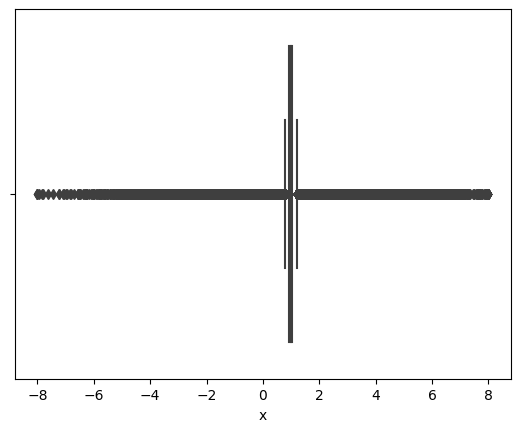

In [40]:

display(shuffled_training_df.describe())#da mean, std, min, cuantiles 25,50,75%, max

display(shuffled_training_df.isna().sum())#dice si hay valores en blanco o no numericos

sns.boxplot(x=shuffled_training_df['x'])#boxplot en wconfid para ver si hay outliers

#z = np.abs(stats.zscore(shuffled_test_df))
#display(np.where(z>3))

plt.show()

# Dividir features de labels

In [33]:
train_features = shuffled_training_df[['wconfid', 'pctid']]
train_labels = shuffled_training_df[['x']]

test_features = shuffled_test_df[['wconfid', 'pctid']]
test_labels = shuffled_test_df[['x']]
display(train_features, train_labels)

,wconfid,pctid
69928,2,100
60305,2,85
52016,2,70
14685,1,95
45144,2,60
...,...,...
13763,1,90
8947,1,85
90038,3,50
40628,2,50


,x
69928,0.434
60305,0.281
52016,1.426
14685,2.277
45144,1.059
...,...
13763,1.500
8947,1.176
90038,0.945
40628,1.074


# Creación del modelo

In [34]:
def my_model(my_learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_shape=(2,), activation='sigmoid'), #se hace una hidden layer de 3 neuronas con activacion sigmoid
        tf.keras.layers.Dense(1) #capa de output
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error", #funcion de perdida
                metrics=[tf.keras.metrics.MeanSquaredError()] #funcion de metricas para evaluar
                )
    return model
model = my_model(0.01)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 9         
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento del Modelo

In [35]:
def train_model(model, features, labels, epochs, batch_size):
    
    early_stop= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) #patience es la cant de epochs antes de chequear el improvement
    history = model.fit(
        x=features,
        y=labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.25,
        callbacks = early_stop
    )
    hist= pd.DataFrame(history.history) #se guardan los valores de errores y metricas en un diccionario
    hist['epoch'] = history.epoch #los epochs se deben añadir aparte
    mse = hist['mean_squared_error']
    
    return hist, mse

# Ploteo de gráficas

In [36]:
def plot_loss_curve(history):
    hist = history
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error', c='r')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label='Validation Error', c='b')
    
    plt.legend()
    plt.ylim([0.7,0.9])
    plt.show()

# Hyperparámetros

In [37]:
learning_rate = 0.01
epochs = 50
batch_size = 100

# Llamado de funciones

Epoch 1/50
918/918 [==============================] - 1s 871us/step - loss: 0.7480 - mean_squared_error: 0.7480 - val_loss: 0.7453 - val_mean_squared_error: 0.7453
Epoch 2/50
918/918 [==============================] - 1s 793us/step - loss: 0.7479 - mean_squared_error: 0.7479 - val_loss: 0.7458 - val_mean_squared_error: 0.7458
Epoch 3/50
918/918 [==============================] - 1s 790us/step - loss: 0.7478 - mean_squared_error: 0.7478 - val_loss: 0.7470 - val_mean_squared_error: 0.7470
Epoch 4/50
918/918 [==============================] - 1s 799us/step - loss: 0.7483 - mean_squared_error: 0.7483 - val_loss: 0.7453 - val_mean_squared_error: 0.7453
Epoch 5/50
918/918 [==============================] - 1s 790us/step - loss: 0.7477 - mean_squared_error: 0.7477 - val_loss: 0.7464 - val_mean_squared_error: 0.7464
Epoch 6/50
918/918 [==============================] - 1s 799us/step - loss: 0.7479 - mean_squared_error: 0.7479 - val_loss: 0.7460 - val_mean_squared_error: 0.7460
Epoch 7/50
918/9

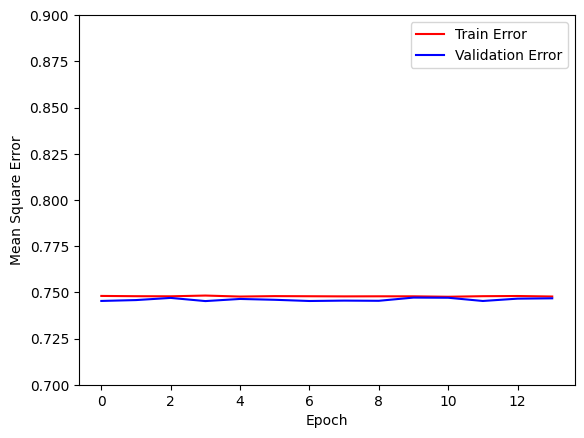

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
0,0.748,0.748,0.745,0.745,0
1,0.748,0.748,0.746,0.746,1
2,0.748,0.748,0.747,0.747,2
3,0.748,0.748,0.745,0.745,3
4,0.748,0.748,0.746,0.746,4
...,...,...,...,...,...
9,0.748,0.748,0.747,0.747,9
10,0.748,0.748,0.747,0.747,10
11,0.748,0.748,0.745,0.745,11
12,0.748,0.748,0.747,0.747,12


In [38]:
model = my_model(learning_rate)
history, mse = train_model(model, train_features, train_labels, epochs, batch_size)
plot_loss_curve(history)
display(history)

# Predicciones

In [39]:
test_predictions = model.predict(test_features)
test_predictions_df = pd.DataFrame(test_predictions, columns = ['predictions'])
results = pd.concat([test_features, test_labels, test_predictions_df], axis=1, join='inner')
display(results)


4782/4782 [==============================] - 2s 484us/step


,wconfid,pctid,x,predictions
50634,1,100,0.500,0.957
14772,1,40,1.031,0.957
18946,1,50,1.004,0.957
90578,2,85,1.758,0.957
113406,3,35,1.000,0.957
...,...,...,...,...
136565,3,75,1.078,0.957
64148,2,40,0.980,0.957
140457,3,80,0.973,0.957
112332,3,35,1.035,0.957
